In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
data = pd.read_csv('cab_rides.csv')
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [3]:
weather = pd.read_csv('weather.csv')
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [4]:
data.shape

(693071, 10)

In [5]:
weather.shape

(6276, 8)

In [6]:
data.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [7]:
weather.dtypes

temp          float64
location       object
clouds        float64
pressure      float64
rain          float64
time_stamp      int64
humidity      float64
wind          float64
dtype: object

In [8]:
data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [9]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [10]:
data['date_time'] = pd.to_datetime(data['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

In [11]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [12]:
data['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [13]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


In [14]:
data['merge_date'] = data.source.astype(str) +" - "+ data.date_time.dt.date.astype("str") +" - "+ data.date_time.dt.hour.astype("str")
weather['merge_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

In [15]:
weather.index = weather['merge_date']

In [16]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3


In [17]:
data = data.join(weather,on=['merge_date'],rsuffix ='_w')

In [18]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4


In [19]:
data.shape

(1268639, 22)

In [20]:
data['rain'].fillna(0,inplace=True)

In [21]:
data = data[pd.notnull(data['date_time_w'])]

In [22]:
data = data[pd.notnull(data['price'])]

In [23]:
data['day'] = data.date_time.dt.dayofweek

In [24]:
data['hour'] = data.date_time.dt.hour

In [25]:
data['month'] = data.date_time.dt.month

In [26]:
data['year'] = data.date_time.dt.year

In [27]:
data['dayname'] = data.date_time.dt.day_name()

In [28]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour', 'month', 'year', 'dayname'],
      dtype='object')

In [29]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour,month,year,dayname
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9,6,9,12,2018,Sunday
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2,1,2,11,2018,Tuesday
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2,1,2,11,2018,Tuesday
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4,4,4,11,2018,Friday
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1.543462e+09,0.71,11.30,2018-11-29 03:32:09,Haymarket Square - 2018-11-29 - 3,3,3,11,2018,Thursday


In [30]:
data.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date_time           0
merge_date          0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp_w        0
humidity            0
wind                0
date_time_w         0
merge_date_w        0
day                 0
hour                0
month               0
year                0
dayname             0
dtype: int64

In [31]:
data.dtypes

distance                   float64
cab_type                    object
time_stamp                   int64
destination                 object
source                      object
price                      float64
surge_multiplier           float64
id                          object
product_id                  object
name                        object
date_time           datetime64[ns]
merge_date                  object
temp                       float64
location                    object
clouds                     float64
pressure                   float64
rain                       float64
time_stamp_w               float64
humidity                   float64
wind                       float64
date_time_w         datetime64[ns]
merge_date_w                object
day                          int64
hour                         int64
month                        int64
year                         int64
dayname                     object
dtype: object

In [32]:
data['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [33]:
data['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [34]:
data['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [35]:
print(max(data['price']), min(data['price']))

97.5 2.5


C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance', ylabel='Density'>

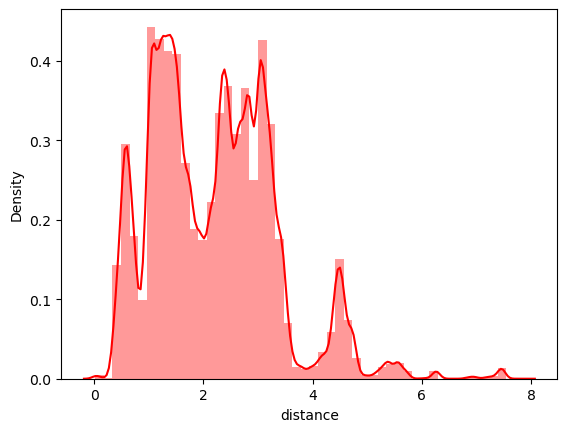

In [36]:
sns.distplot(data['distance'], kde = True, color = 'red')

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

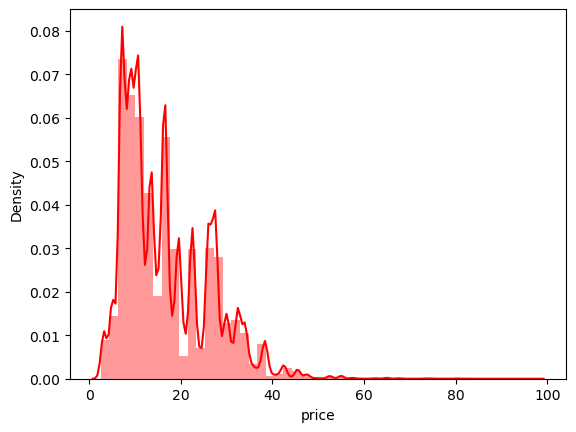

In [37]:
sns.distplot(data['price'], kde = True, color = 'red')

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='surge_multiplier', ylabel='Density'>

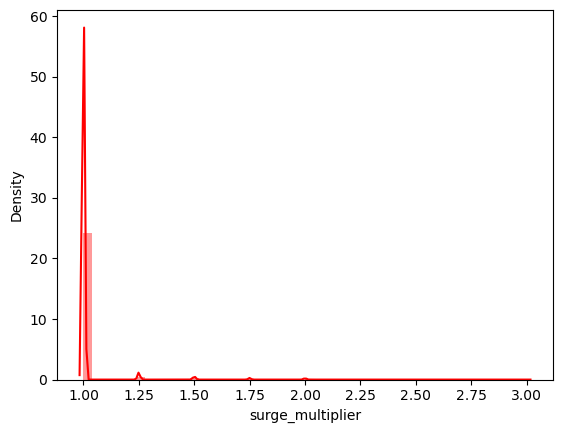

In [38]:
sns.distplot(data['surge_multiplier'], kde = True, color = 'red')

In [39]:
def count_function(x,y):
    res = data.groupby([x,y])[y].count().reset_index(name='count')
    return res

In [40]:
x = 'cab_type'
y = 'surge_multiplier'
res = count_function(x,y)
res.head()

,cab_type,surge_multiplier,count
0,Lyft,1.00,522716
1,Lyft,1.25,20203
2,Lyft,1.50,9384
3,Lyft,1.75,4538
4,Lyft,2.00,4013


<AxesSubplot:xlabel='surge_multiplier', ylabel='count'>

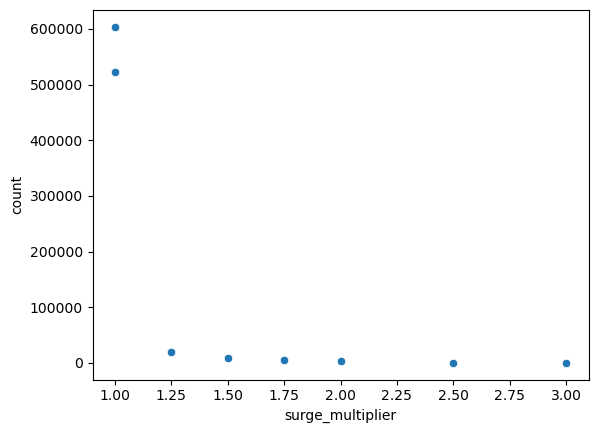

In [41]:
x_axis = 'surge_multiplier'
y_axis = 'count'
sns.scatterplot(x = x_axis, y = y_axis, data = res)

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


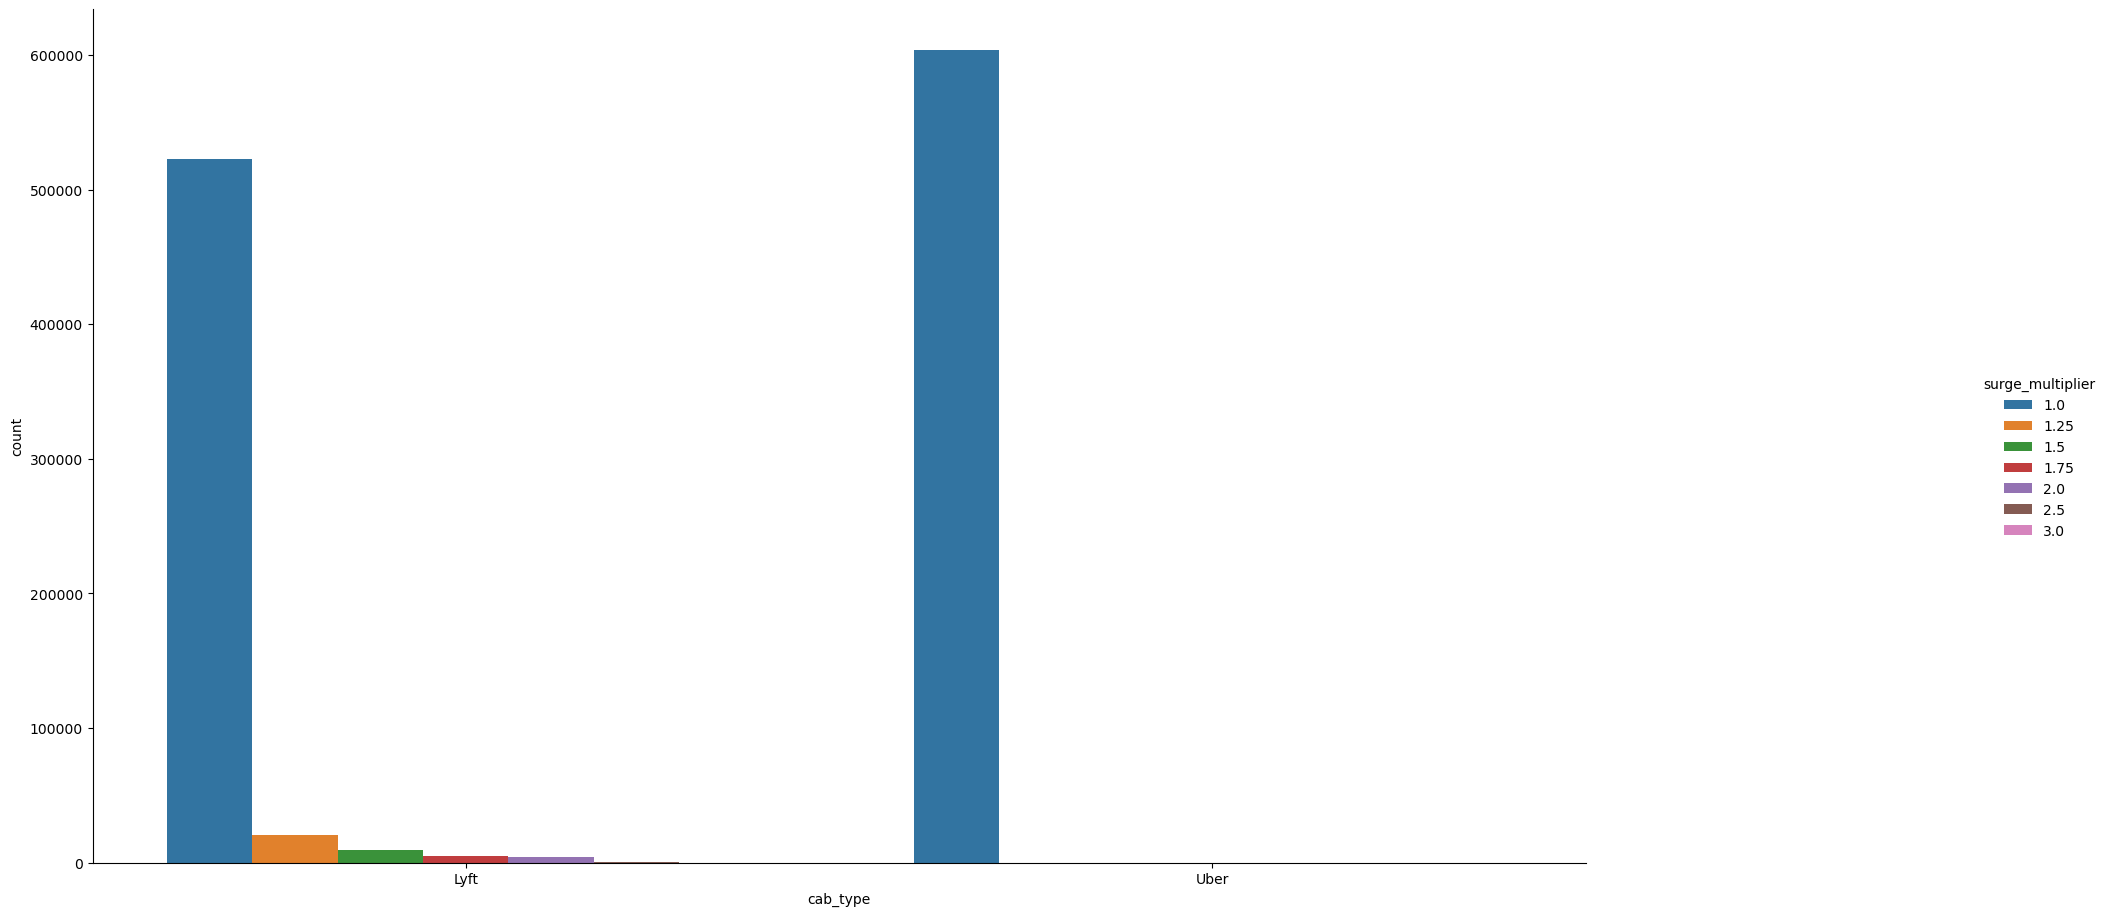

In [42]:
plt = sns.factorplot(x = 'cab_type' , y = 'count', hue = 'surge_multiplier', data = res, kind = 'bar')
plt.fig.set_figwidth(25)
plt.fig.set_figheight(10)

In [43]:
x = 'source'
y = 'surge_multiplier'
res = count_function(x,y)
res.head(5)

,source,surge_multiplier,count
0,Back Bay,1.00,92117
1,Back Bay,1.25,2274
2,Back Bay,1.50,947
3,Back Bay,1.75,863
4,Back Bay,2.00,845


<AxesSubplot:xlabel='surge_multiplier', ylabel='count'>

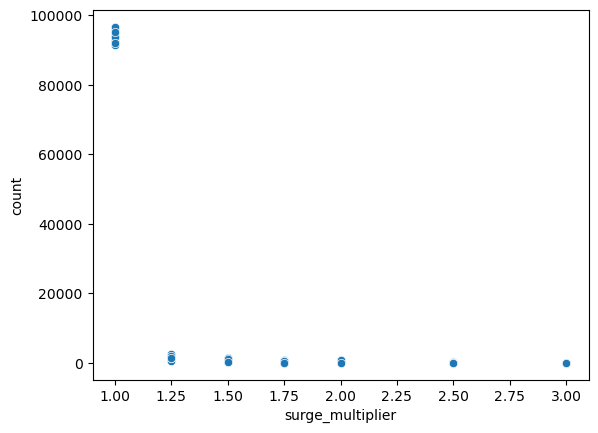

In [44]:
x_axis = 'surge_multiplier'
y_axis = 'count'
sns.scatterplot(x = x_axis, y = y_axis, data = res)

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


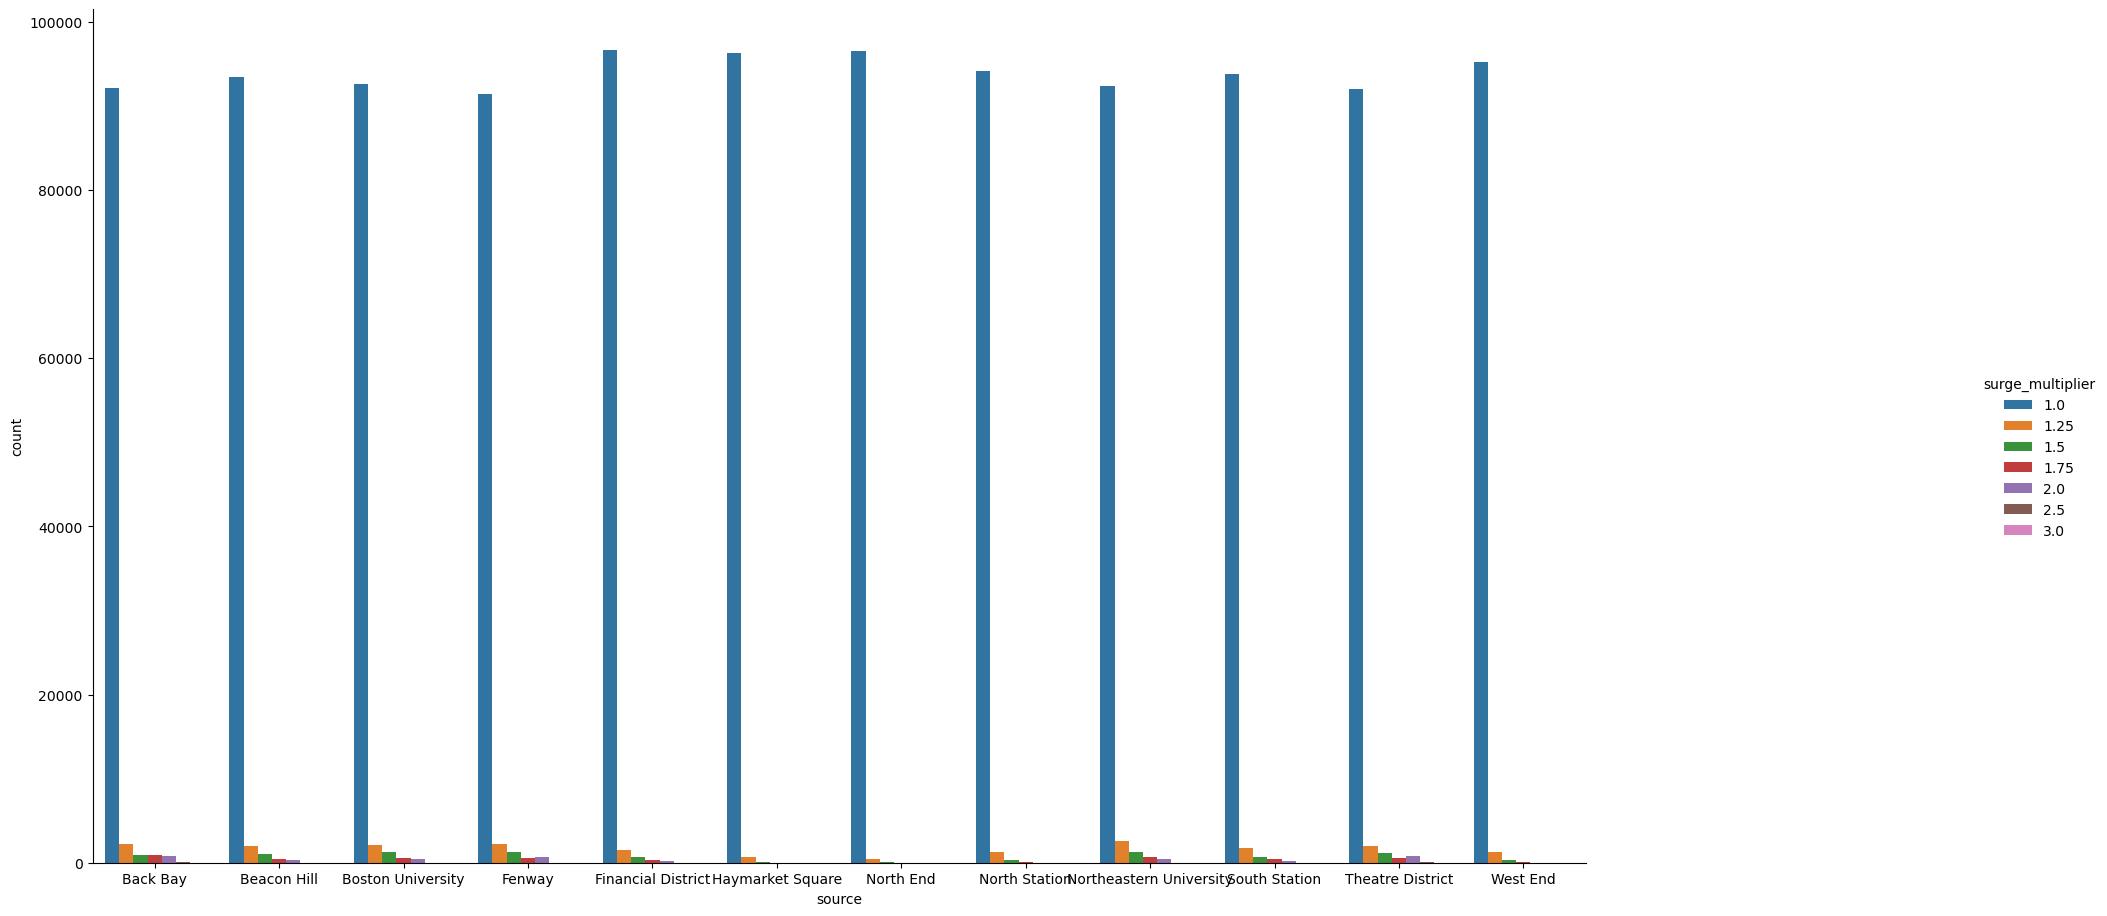

In [45]:
plt = sns.factorplot(x = 'source' , y = 'count', hue = 'surge_multiplier', data = res, kind = 'bar')
plt.fig.set_figwidth(25)
plt.fig.set_figheight(10)

In [46]:
x = 'destination'
y = 'surge_multiplier'
res = count_function(x,y)
res.head(5)

,destination,surge_multiplier,count
0,Back Bay,1.00,94209
1,Back Bay,1.25,1624
2,Back Bay,1.50,844
3,Back Bay,1.75,298
4,Back Bay,2.00,370


<AxesSubplot:xlabel='surge_multiplier', ylabel='count'>

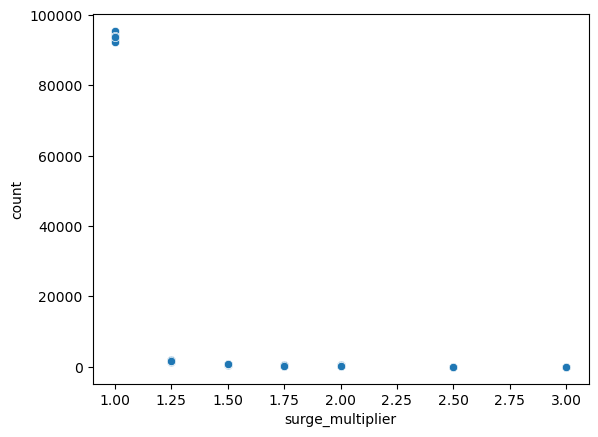

In [47]:
x_axis = 'surge_multiplier'
y_axis = 'count'
sns.scatterplot(x = x_axis, y = y_axis, data = res)

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


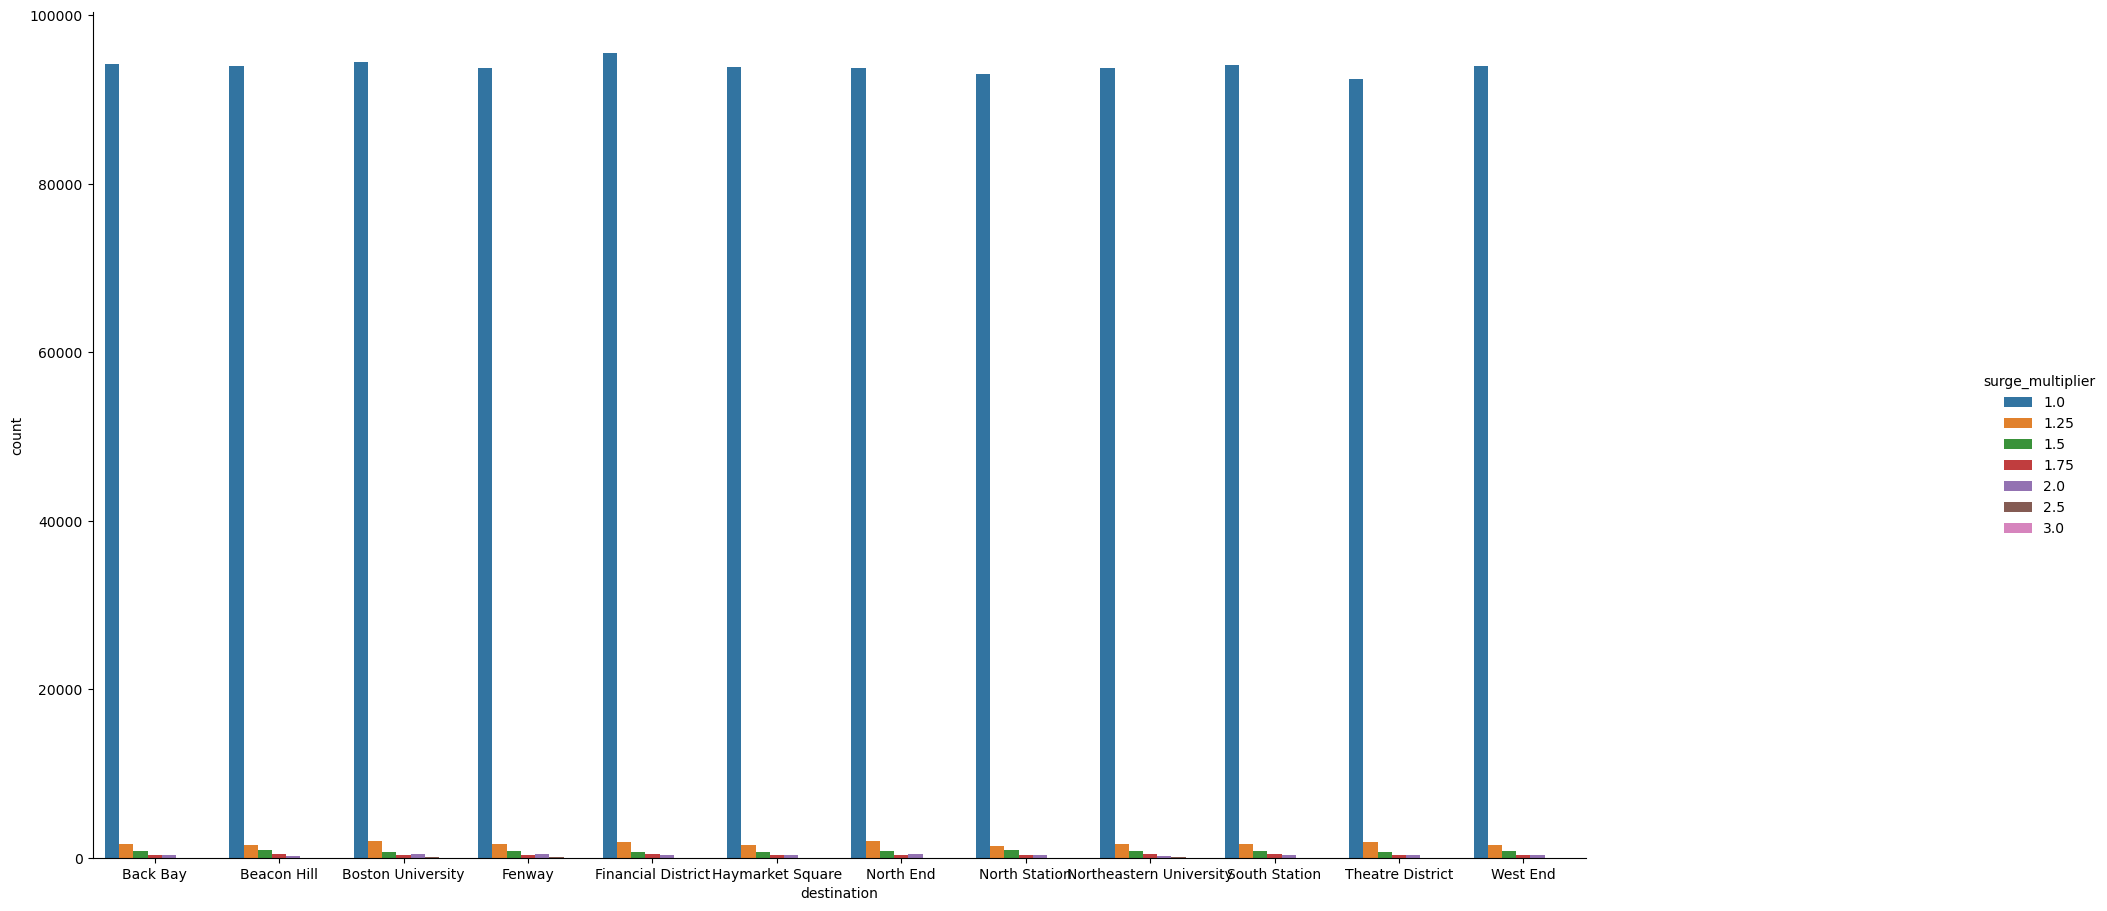

In [48]:
plt = sns.factorplot(x = 'destination' , y = 'count', hue = 'surge_multiplier', data = res, kind = 'bar')
plt.fig.set_figwidth(25)
plt.fig.set_figheight(10)

In [49]:
x = 'dayname'
y = 'surge_multiplier'
res = count_function(x,y)
res.head(5)

,dayname,surge_multiplier,count
0,Friday,1.00,82035
1,Friday,1.25,1407
2,Friday,1.50,703
3,Friday,1.75,269
4,Friday,2.00,309


<AxesSubplot:xlabel='surge_multiplier', ylabel='count'>

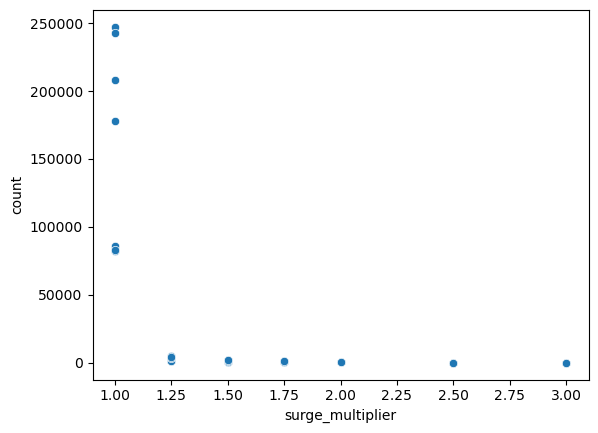

In [50]:
x_axis = 'surge_multiplier'
y_axis = 'count'
sns.scatterplot(x = x_axis, y = y_axis, data = res)

C:\Users\ompra\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


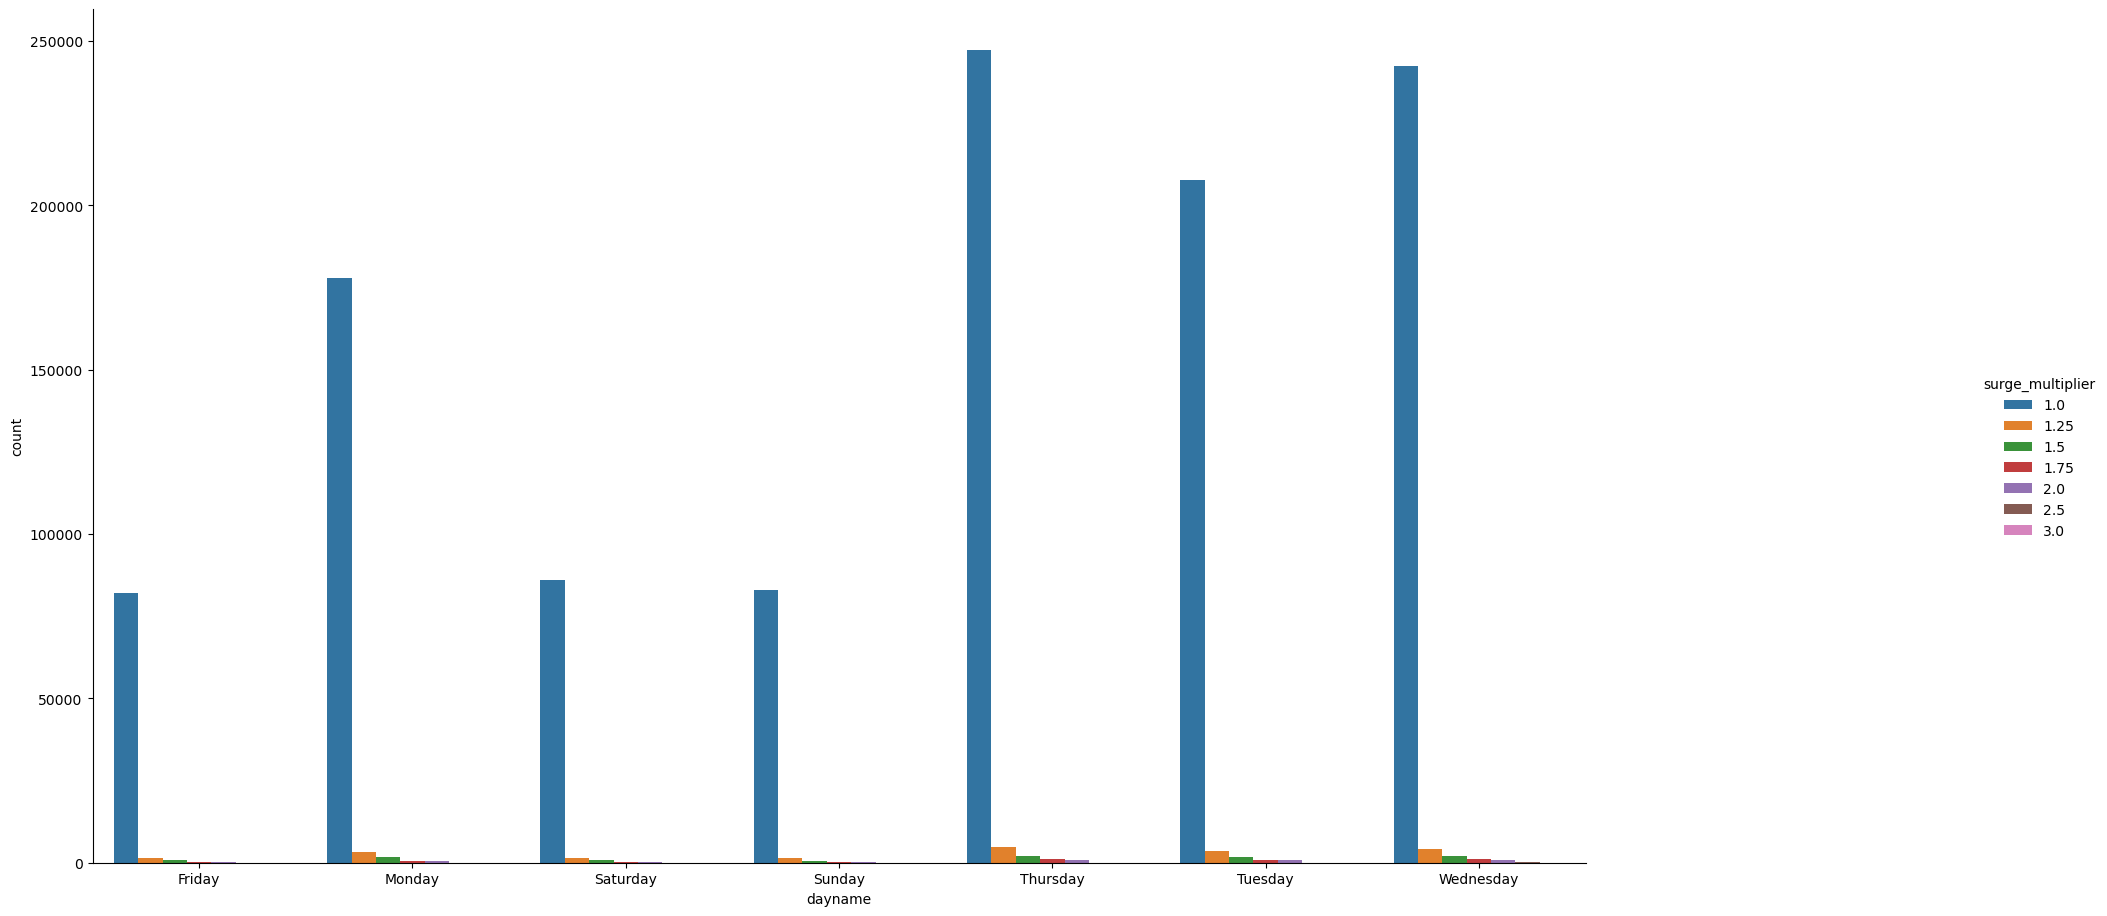

In [51]:
plt = sns.factorplot(x = 'dayname' , y = 'count', hue = 'surge_multiplier', data = res, kind = 'bar')
plt.fig.set_figwidth(25)
plt.fig.set_figheight(10)

In [52]:
data.corr()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_w,humidity,wind,day,hour,month,year
distance,1.000000,0.001844,0.345648,0.025487,-0.002300,-0.000693,0.001457,-0.002469,0.001847,-0.003333,-0.002056,0.003097,-0.001346,0.000658,NaN
time_stamp,0.001844,1.000000,0.000549,0.000582,-0.264111,-0.082449,0.593914,-0.134201,0.999997,-0.203939,-0.121231,0.306171,0.056391,0.836530,NaN
price,0.345648,0.000549,1.000000,0.240652,0.000818,0.001943,0.000295,-0.001108,0.000551,-0.001899,0.000390,0.001339,-0.000494,0.000282,NaN
surge_multiplier,0.025487,0.000582,0.240652,1.000000,-0.001773,-0.000564,-0.002318,-0.005030,0.000581,-0.003105,-0.000609,-0.000329,0.000676,-0.000330,NaN
temp,-0.002300,-0.264111,0.000818,-0.001773,1.000000,0.520569,-0.245069,0.185374,-0.263871,0.356719,0.156654,-0.173013,0.191957,-0.120408,NaN
clouds,-0.000693,-0.082449,0.001943,-0.000564,0.520569,1.000000,-0.078491,0.221853,-0.082408,0.441236,0.116650,-0.244061,0.093700,-0.015301,NaN
pressure,0.001457,0.593914,0.000295,-0.002318,-0.245069,-0.078491,1.000000,0.000075,0.594258,-0.041617,-0.557259,0.466310,-0.042227,0.670675,NaN
rain,-0.002469,-0.134201,-0.001108,-0.005030,0.185374,0.221853,0.000075,1.000000,-0.134023,0.256481,0.224417,-0.144822,-0.208121,-0.118394,NaN
time_stamp_w,0.001847,0.999997,0.000551,0.000581,-0.263871,-0.082408,0.594258,-0.134023,1.000000,-0.203837,-0.121391,0.306414,0.056298,0.836808,NaN
humidity,-0.003333,-0.203939,-0.001899,-0.003105,0.356719,0.441236,-0.041617,0.256481,-0.203837,1.000000,-0.242427,-0.227731,-0.246443,-0.078459,NaN


<AxesSubplot:>

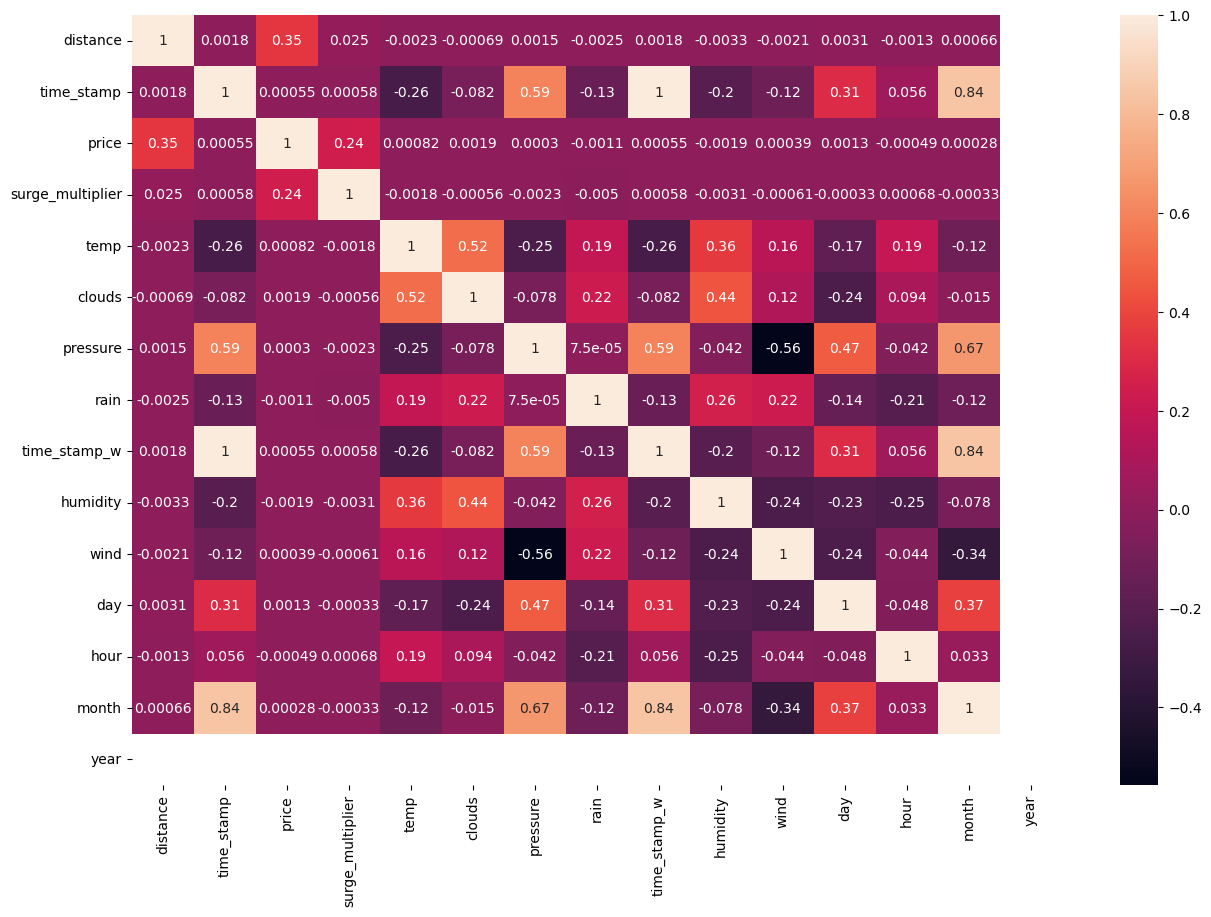

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

Text(0, 0.5, 'price')

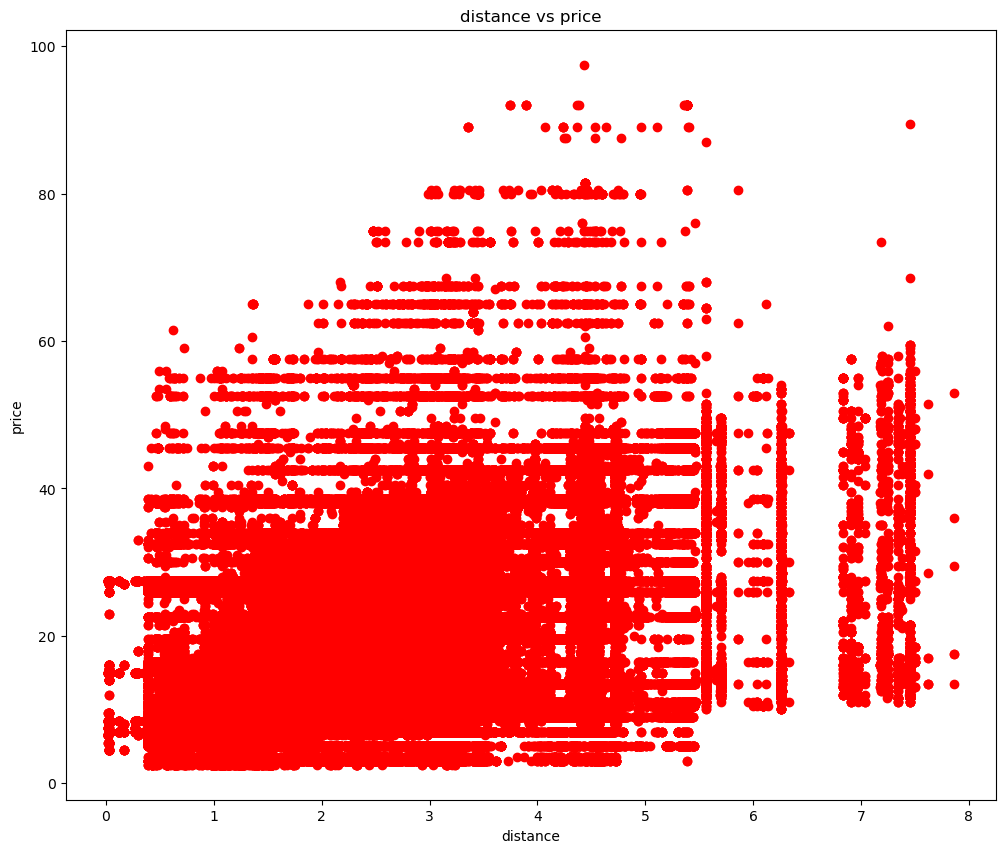

In [54]:
plt.figure(figsize=(12, 10))
plt.plot(data['distance'], data['price'], 'ro')
plt.title('distance vs price')
plt.xlabel("distance")
plt.ylabel("price")

Text(0, 0.5, 'price')

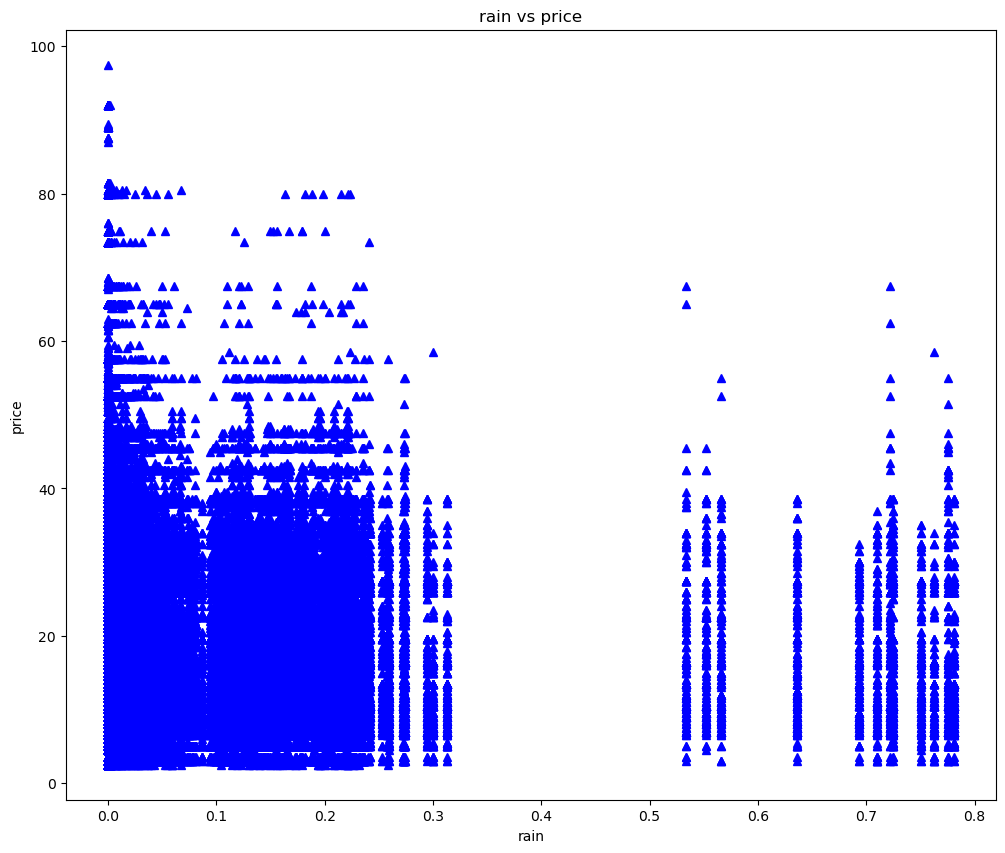

In [55]:
plt.figure(figsize=(12, 10))
plt.plot(data['rain'], data['price'], 'b^')
plt.title('rain vs price')
plt.xlabel("rain")
plt.ylabel("price")

Text(0, 0.5, 'price')

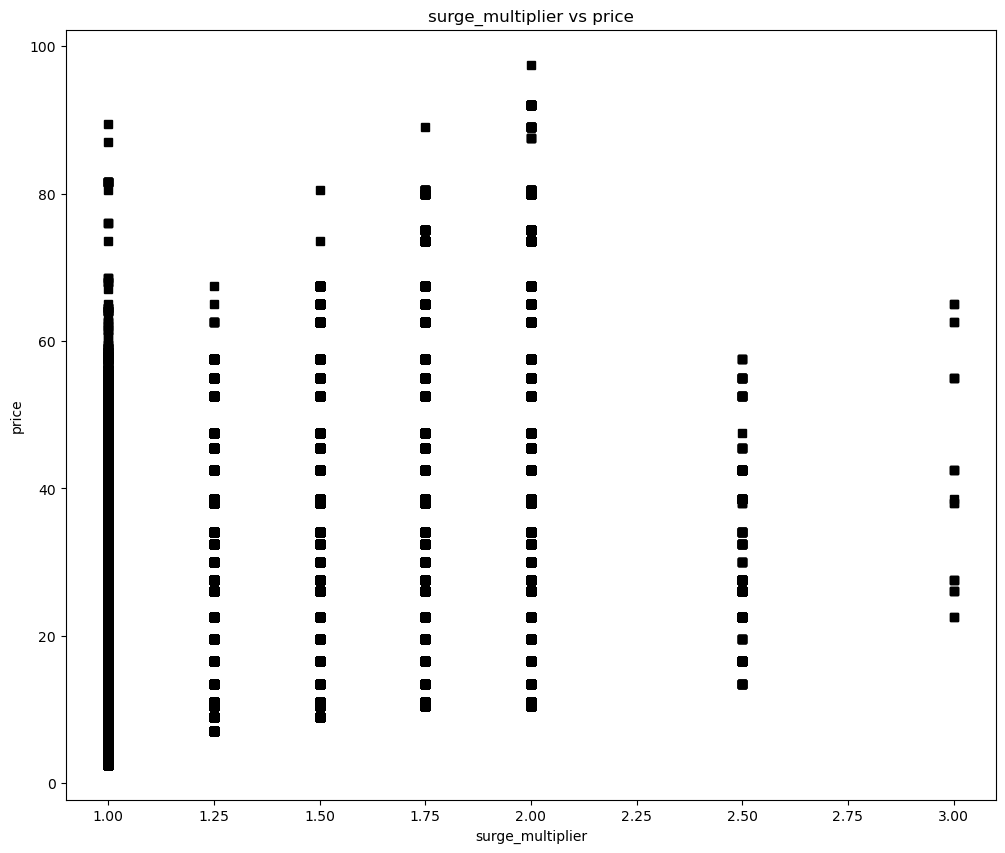

In [56]:
plt.figure(figsize=(12, 10))
plt.plot(data['surge_multiplier'], data['price'], 'ks')
plt.title('surge_multiplier vs price')
plt.xlabel("surge_multiplier")
plt.ylabel("price")

In [80]:
X = data[['source','destination','day','distance','hour','temp','clouds', 'pressure','humidity', 'wind']]

In [81]:
source_label  = {
    'Haymarket Square':1, 'Back Bay':2, 'North End':3, 'North Station':4,
    'Beacon Hill':5, 'Boston University':6, 'Fenway':7, 'South Station':8,
    'Theatre District':6, 'West End':7, 'Financial District':8,
    'Northeastern University':9
}

In [82]:
destination_label = {
    'North Station':1, 'Northeastern University':2, 'West End':3,
    'Haymarket Square':4, 'South Station':5, 'Fenway':6, 'Theatre District':7,
    'Beacon Hill':8, 'Back Bay':9, 'North End':10, 'Financial District':11,
    'Boston University':12
}

In [83]:
def source(x):
    return source_label[x]

In [84]:
def destination(x):
    return destination_label[x]

In [85]:
X['source'] = X['source'].apply(source)

C:\Users\ompra\AppData\Local\Temp\ipykernel_5952\3772783858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['source'] = X['source'].apply(source)


In [86]:
X['destination'] = X['destination'].apply(destination)

C:\Users\ompra\AppData\Local\Temp\ipykernel_5952\1146442092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['destination'] = X['destination'].apply(destination)


In [87]:
X.head()

,source,destination,day,distance,hour,temp,clouds,pressure,humidity,wind
0,1,1,6,0.44,9,38.46,0.29,1022.25,0.76,7.68
1,1,1,1,0.44,2,44.31,1.00,1003.17,0.90,13.69
1,1,1,1,0.44,2,43.82,0.99,1002.59,0.89,11.57
3,1,1,4,0.44,4,35.08,0.00,1013.71,0.70,5.25
4,1,1,3,0.44,3,37.58,0.42,998.64,0.71,11.30


In [105]:
X.dtypes

source           int64
destination      int64
day              int64
distance       float64
hour             int64
temp           float64
clouds         float64
pressure       float64
humidity       float64
wind           float64
dtype: object

In [88]:
Y = data[['price']]

In [89]:
Y.count()

price    1164996
dtype: int64

In [90]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [91]:
X.head()

,source,destination,day,distance,hour,temp,clouds,pressure,humidity,wind
0,1,1,6,0.44,9,38.46,0.29,1022.25,0.76,7.68
1,1,1,1,0.44,2,44.31,1.00,1003.17,0.90,13.69
2,1,1,1,0.44,2,43.82,0.99,1002.59,0.89,11.57
3,1,1,4,0.44,4,35.08,0.00,1013.71,0.70,5.25
4,1,1,3,0.44,3,37.58,0.42,998.64,0.71,11.30


In [92]:
Y.head()

,price
0,5.0
1,11.0
1,11.0
3,26.0
4,9.0


In [93]:
features = pd.get_dummies(X)
features.columns

Index(['source', 'destination', 'day', 'distance', 'hour', 'temp', 'clouds',
       'pressure', 'humidity', 'wind'],
      dtype='object')

In [94]:
labels = np.array(Y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [95]:
labels

array([[ 5. ],
       [11. ],
       [11. ],
       ...,
       [ 9.5],
       [27. ],
       [10. ]])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [97]:
#Linear regression
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [98]:
print(reg.coef_)
print(reg.intercept_)
ypred=reg.predict(x_test)

[[-9.69291396e-03  1.25032946e-02  5.24075944e-04  2.84665725e+00
  -5.53697061e-04  2.86619329e-03  8.25985580e-02  6.00585379e-05
  -2.36879972e-01 -1.60958625e-03]]
[10.24787618]


In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))
r2 = r2_score(y_test, ypred)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 7.092688965799351
Mean Squared Error: 76.36961320666533
Root Mean Squared Error: 8.738970946665594
r2 score for perfect model is 0.11835962088262986


In [100]:
#Decision Tree Regressor
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

In [101]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,Ypred)))
scor = r2_score(y_test, Ypred)
print('r2 score for perfect model is', scor)

Mean Absolute Error: 7.967505946030458
Mean Squared Error: 102.55822398271633
Root Mean Squared Error: 10.127103434976673
r2 score for perfect model is -0.1839718400699537


In [102]:
Pkl_filename = "tspds.pkl"  
pickle.dump(reg, open(Pkl_filename, 'wb'))